In [0]:
from synapse.ml.lightgbm import LightGBMClassifier

In [0]:
# Read dataset from  /FileStore/tables/application_train.csv
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType
df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/application_train.csv"))

In [0]:
#Next, I would like to see the structure of the data. What the table looks like. So I will display the first few rows of the data
display(df)

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG COMMONAREA_AVG ELEVATORS_AVG ENTRANCES_AVG FLOORSMAX_AVG FLOORSMIN_AVG LANDAREA_AVG LIVINGAPARTMENTS_AVG LIVINGAREA_AVG NONLIVINGAPARTMENTS_AVG NONLIVINGAREA_AVG APARTMENTS_MODE BASEMENTAREA_MODE YEARS_BEGINEXPLUATATION_MODE YEARS_BUILD_MODE COMMONAREA_MODE ELEVATORS_MODE ENTRANCES_MODE FLOORSMAX_MODE FLOORSMIN_MODE LANDAREA_MODE LIVINGAPARTMENTS_MODE LIVINGAREA_MODE NONLIVINGAPARTMENTS_MODE NONLIVINGAREA_MODE APARTMENTS_MEDI BASEMENTAREA_MEDI YEARS_BEGINEXPLUATATION_MEDI YEARS_BUILD_MEDI COMMONAREA_MEDI ELEVATORS_MEDI ENTRANCES_MEDI FLOORSMAX_MEDI FLOORSMIN_MEDI LANDAREA_MEDI LIVINGAPARTMENTS_MEDI LIVINGAREA_MEDI NONLIVINGAPARTMENTS_MEDI NONLIVINGAREA_MEDI FONDKAPREMONT_MODE HOUSETYPE_MODE TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR 100002 1 Cash loans M N Y 0 202500.0 406597.5 24700.5 351000.0 Unaccompanied Working Secondary / secondary special Single / not married House / apartment 0.018801 -9461 -637 -3648.0 -2120 null 1 1 0 1 1 0 Laborers 1.0 2 2 WEDNESDAY 10 0 0 0 0 0 0 Business Entity Type 3 0.08303696739132256 0.2629485927471776 0.13937578009978951 0.0247 0.0369 0.9722 0.6192 0.0143 0.0 0.069 0.0833 0.125 0.0369 0.0202 0.019 0.0 0.0 0.0252 0.0383 0.9722 0.6341 0.0144 0.0 0.069 0.0833 0.125 0.0377 0.022 0.0198 0.0 0.0 0.025 0.0369 0.9722 0.6243 0.0144 0.0 0.069 0.0833 0.125 0.0375 0.0205 0.0193 0.0 0.0 reg oper account block of flats 0.0149 Stone, brick No 2.0 2.0 2.0 2.0 -1134.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 1.0 100003 0 Cash loans F N N 0 270000.0 1293502.5 35698.5 1129500.0 Family State servant Higher education Married House / apartment 0.003540999999999999 -16765 -1188 -1186.0 -291 null 1 1 0 1 1 0 Core staff 2.0 1 1 MONDAY 11 0 0 0 0 0 0 School 0.3112673113812225 0.6222457752555098 null 0.0959 0.0529 0.9851 0.7959999999999999 0.0605 0.08 0.0345 0.2917 0.3333 0.013 0.0773 0.0549 0.0039 0.0098 0.0924 0.0538 0.9851 0.804 0.0497 0.0806 0.0345 0.2917 0.3333 0.0128 0.079 0.0554 0.0 0.0 0.0968 0.0529 0.9851 0.7987 0.0608 0.08 0.0345 0.2917 0.3333 0.0132 0.0787 0.0558 0.0039 0.01 reg oper account block of flats 0.0714 Block No 1.0 0.0 1.0 0.0 -828.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 0.0 100004 0 Revolving loans M Y Y 0 67500.0 135000.0 6750.0 135000.0 Unaccompanied Working Secondary / secondary special Single / not married House / apartment 0.010032 -19046 -225 -4260.0 -2531 26.0 1 1 1 1 1 0 Laborers 1.0 2 2 MONDAY 9 0 0 0 0 0 0 Government null 0.5559120833904428 0.7295666907060153 null null null null null null null null null null null nul

In [0]:
#Time for some data exploraion. df.printschema() will show all the columns in the dataset. This will allow me to review all the columns and also identify the data types
df.printSchema()

root
 |-- SK_ID_CURR: integer (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- AMT_GOODS_PRICE: double (nullable = true)
 |-- NAME_TYPE_SUITE: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- REGION_POPULATION_RELATIVE: double (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- DAYS_REGISTRATION: double (nullable = true)
 |-- DAYS_ID_PUBLISH: integer (nullable = true)
 |-- OWN_CAR_AG

In [0]:
#Next, I would like to see the number of rows in my dataset so as to see how many rows I will be dealing with. After using the df.count() function, I find out that thet dataset includes 307,511 rows. 
df.count()

Out[6]: 307511

In [0]:
#I went ahead to group the column "NAME_CONTRACT_TYPE" to find out the distributon of loan types.
df.groupBy("NAME_CONTRACT_TYPE").count().show()

+------------------+------+
|NAME_CONTRACT_TYPE| count|
+------------------+------+
|   Revolving loans| 29279|
|        Cash loans|278232|
+------------------+------+



In [0]:
# Next, I would like to see the gender distribution in the dataset because I would like to know how much gender plays a part in the ability of people to repay loans.
df.groupBy("CODE_GENDER").count().show()

+-----------+------+
|CODE_GENDER| count|
+-----------+------+
|          F|202448|
|          M|105059|
|        XNA|     4|
+-----------+------+



In [0]:
#Next I would like to see the datatypes for the datatypes of the columns in the dataset
df.dtypes

Out[9]: [('SK_ID_CURR', 'int'),
 ('TARGET', 'int'),
 ('NAME_CONTRACT_TYPE', 'string'),
 ('CODE_GENDER', 'string'),
 ('FLAG_OWN_CAR', 'string'),
 ('FLAG_OWN_REALTY', 'string'),
 ('CNT_CHILDREN', 'int'),
 ('AMT_INCOME_TOTAL', 'double'),
 ('AMT_CREDIT', 'double'),
 ('AMT_ANNUITY', 'double'),
 ('AMT_GOODS_PRICE', 'double'),
 ('NAME_TYPE_SUITE', 'string'),
 ('NAME_INCOME_TYPE', 'string'),
 ('NAME_EDUCATION_TYPE', 'string'),
 ('NAME_FAMILY_STATUS', 'string'),
 ('NAME_HOUSING_TYPE', 'string'),
 ('REGION_POPULATION_RELATIVE', 'double'),
 ('DAYS_BIRTH', 'int'),
 ('DAYS_EMPLOYED', 'int'),
 ('DAYS_REGISTRATION', 'double'),
 ('DAYS_ID_PUBLISH', 'int'),
 ('OWN_CAR_AGE', 'double'),
 ('FLAG_MOBIL', 'int'),
 ('FLAG_EMP_PHONE', 'int'),
 ('FLAG_WORK_PHONE', 'int'),
 ('FLAG_CONT_MOBILE', 'int'),
 ('FLAG_PHONE', 'int'),
 ('FLAG_EMAIL', 'int'),
 ('OCCUPATION_TYPE', 'string'),
 ('CNT_FAM_MEMBERS', 'double'),
 ('REGION_RATING_CLIENT', 'int'),
 ('REGION_RATING_CLIENT_W_CITY', 'int'),
 ('WEEKDAY_APPR_PROCESS_S

In [0]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
# Converting the relevant string columns into indexes
# Firstly import the relevant libraries
from pyspark.ml.feature import StringIndexer

In [0]:
# Next step will be the cleaning process. I want to drop every null value so we dont have blank row in our dataset. 
df = df.dropna()

In [0]:
indexerGender_ = StringIndexer(inputCol="CODE_GENDER", outputCol="indexed_CODE_GENDER_")
indexerIncomeType_ = StringIndexer(inputCol="NAME_INCOME_TYPE", outputCol="indexed_NAME_INCOME_TYPE_")
indexerFamilyStatus_ = StringIndexer(inputCol="NAME_FAMILY_STATUS", outputCol="indexed_FAMILY_STATUS_")
indexerOccupation_ = StringIndexer(inputCol="OCCUPATION_TYPE", outputCol="indexed_OCCUPATION_")

In [0]:
df = indexerGender_.fit(df).transform(df)
df = indexerIncomeType_.fit(df).transform(df)
df = indexerFamilyStatus_.fit(df).transform(df)
df = indexerOccupation_.fit(df).transform(df)

Want to see the correlation between features

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
display(df)

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH OWN_CAR_AGE FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG COMMONAREA_AVG ELEVATORS_AVG ENTRANCES_AVG FLOORSMAX_AVG FLOORSMIN_AVG LANDAREA_AVG LIVINGAPARTMENTS_AVG LIVINGAREA_AVG NONLIVINGAPARTMENTS_AVG NONLIVINGAREA_AVG APARTMENTS_MODE BASEMENTAREA_MODE YEARS_BEGINEXPLUATATION_MODE YEARS_BUILD_MODE COMMONAREA_MODE ELEVATORS_MODE ENTRANCES_MODE FLOORSMAX_MODE FLOORSMIN_MODE LANDAREA_MODE LIVINGAPARTMENTS_MODE LIVINGAREA_MODE NONLIVINGAPARTMENTS_MODE NONLIVINGAREA_MODE APARTMENTS_MEDI BASEMENTAREA_MEDI YEARS_BEGINEXPLUATATION_MEDI YEARS_BUILD_MEDI COMMONAREA_MEDI ELEVATORS_MEDI ENTRANCES_MEDI FLOORSMAX_MEDI FLOORSMIN_MEDI LANDAREA_MEDI LIVINGAPARTMENTS_MEDI LIVINGAREA_MEDI NONLIVINGAPARTMENTS_MEDI NONLIVINGAREA_MEDI FONDKAPREMONT_MODE HOUSETYPE_MODE TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR indexed_CODE_GENDER_ indexed_NAME_INCOME_TYPE_ indexed_FAMILY_STATUS_ indexed_OCCUPATION_ 100083 0 Cash loans M Y Y 0 103500.0 573628.5 24435.0 463500.0 Unaccompanied Working Secondary / secondary special Married House / apartment 0.009656999999999999 -15406 -892 -341.0 -4176 22.0 1 1 0 1 0 0 Laborers 2.0 2 2 MONDAY 18 0 0 0 0 0 0 Business Entity Type 3 0.2707661633733818 0.7071263161734994 0.5971924268337128 0.1464 0.1291 0.9861 0.8096 0.108 0.04 0.0345 0.3333 0.375 0.0 0.1194 0.0933 0.0 0.0 0.1492 0.134 0.9861 0.8171 0.109 0.0403 0.0345 0.3333 0.375 0.0 0.1304 0.0972 0.0 0.0 0.1478 0.1291 0.9861 0.8121 0.1087 0.04 0.0345 0.3333 0.375 0.0 0.1214 0.0949 0.0 0.0 reg oper account block of flats 0.1324 Stone, brick No 2.0 1.0 2.0 1.0 -2053.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 100145 0 Cash loans F Y Y 1 202500.0 260725.5 16789.5 198000.0 Family Working Secondary / secondary special Separated House / apartment 0.01885 -16282 -4375 -762.0 -1494 8.0 1 1 0 1 0 0 Laborers 2.0 2 2 TUESDAY 11 0 0 0 0 0 0 Self-employed 0.6470448716896019 0.7464864055627681 0.7394117535524816 0.0928 0.1 0.9801 0.728 0.0463 0.0 0.2069 0.1667 0.2083 0.0437 0.0756 0.0903 0.0 0.0 0.0945 0.1038 0.9801 0.7387 0.0467 0.0 0.2069 0.1667 0.2083 0.0447 0.0826 0.0941 0.0 0.0 0.0937 0.1 0.9801 0.7316 0.0466 0.0 0.2069 0.1667 0.2083 0.0445 0.077 0.0919 0.0 0.0 reg oper spec account block of flats 0.071 Panel No 6.0 0.0 6.0 0.0 -1782.0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0 0.0 0.0 0.0 0.0 3.0 1.0 0.0 3.0 0.0 100179 0 Cash loans F Y N 0 202500.0 675000.0 53329.5 675000.0 Unaccompanied Commercial associate Higher education Married House / apartment 0.031329 -11375 -2311 -180.0 -2009 4.0 1 1 0 1 0 0 Managers 2.0 2 2 MONDAY 13 0 0 0 0 0 0 Trade: type 7 0.67483151266

In [0]:
# I will now select only the required columns and drop the rest so as to trim the dataset and make it run faster. 
df = df.select(
  "CODE_GENDER",
  "NAME_INCOME_TYPE",
  "NAME_EDUCATION_TYPE",
  "NAME_FAMILY_STATUS",
  "NAME_HOUSING_TYPE",
  "OCCUPATION_TYPE",
  "TARGET",
  "CNT_CHILDREN",
  "AMT_INCOME_TOTAL",
  "AMT_CREDIT",
  "AMT_ANNUITY",
  "DAYS_BIRTH",
  "DAYS_EMPLOYED",
  "indexed_CODE_GENDER_",
    "indexed_NAME_INCOME_TYPE_",
    "indexed_FAMILY_STATUS_",
    "indexed_OCCUPATION_")

In [0]:
df.dtypes

Out[59]: [('CODE_GENDER', 'string'),
 ('NAME_INCOME_TYPE', 'string'),
 ('NAME_EDUCATION_TYPE', 'string'),
 ('NAME_FAMILY_STATUS', 'string'),
 ('NAME_HOUSING_TYPE', 'string'),
 ('OCCUPATION_TYPE', 'string'),
 ('TARGET', 'int'),
 ('CNT_CHILDREN', 'int'),
 ('AMT_INCOME_TOTAL', 'double'),
 ('AMT_CREDIT', 'double'),
 ('AMT_ANNUITY', 'double'),
 ('DAYS_BIRTH', 'int'),
 ('DAYS_EMPLOYED', 'int'),
 ('indexed_CODE_GENDER_', 'double'),
 ('indexed_NAME_INCOME_TYPE_', 'double'),
 ('indexed_FAMILY_STATUS_', 'double'),
 ('indexed_OCCUPATION_', 'double')]

In [0]:
display(df)

CODE_GENDER NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE OCCUPATION_TYPE TARGET CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY DAYS_BIRTH DAYS_EMPLOYED indexed_CODE_GENDER_ indexed_NAME_INCOME_TYPE_ indexed_FAMILY_STATUS_ indexed_OCCUPATION_ M Working Secondary / secondary special Married House / apartment Laborers 0 0 103500.0 573628.5 24435.0 -15406 -892 0.0 0.0 0.0 0.0 F Working Secondary / secondary special Separated House / apartment Laborers 0 1 202500.0 260725.5 16789.5 -16282 -4375 1.0 0.0 3.0 0.0 F Commercial associate Higher education Married House / apartment Managers 0 0 202500.0 675000.0 53329.5 -11375 -2311 1.0 1.0 0.0 1.0 M Commercial associate Higher education Married House / apartment Laborers 0 0 162000.0 263686.5 24781.5 -13972 -4472 0.0 1.0 0.0 0.0 M Commercial associate Secondary / secondary special Single / not married House / apartment Laborers 1 1 225000.0 1019205.0 31032.0 -11356 -602 0.0 1.0 1.0 0.0 M Working Secondary / secondary special Widow House / apartment Laborers 0 0 76500.0 545040.0 20677.5 -20348 -7115 0.0 0.0 4.0 0.0 M Working Secondary / secondary special Single / not married With parents Drivers 0 0 315000.0 90000.0 4504.5 -10935 -422 0.0 0.0 1.0 4.0 F Commercial associate Higher education Married House / apartment Core staff 0 1 360000.0 493497.0 48942.0 -14882 -436 1.0 1.0 0.0 2.0 F Commercial associate Higher education Civil marriage House / apartment Core staff 0 1 450000.0 808650.0 31464.0 -14768 -426 1.0 1.0 2.0 2.0 M Working Secondary / secondary special Married House / apartment Drivers 0 0 360000.0 254700.0 20250.0 -18831 -1342 0.0 0.0 0.0 4.0 M Working Higher education Married House / apartment Core staff 0 0 247500.0 1971072.0 68643.0 -14216 -365 0.0 0.0 0.0 2.0 M Commercial associate Secondary / secondary special Married Municipal apartment Drivers 0 0 225000.0 888840.0 32053.5 -16719 -687 0.0 1.0 0.0 4.0 F Working Higher education Married House / apartment Core staff 0 2 90000.0 688500.0 20259.0 -12982 -2850 1.0 0.0 0.0 2.0 M Working Secondary / secondary special Single / not married House / apartment Laborers 0 0 90000.0 180000.0 9000.0 -9496 -189 0.0 0.0 1.0 0.0 F Commercial associate Higher education Married House / apartment Managers 0 0 450000.0 1971072.0 62019.0 -18268 -2569 1.0 1.0 0.0 1.0 F Commercial associate Incomplete higher Married House / apartment Sales staff 0 0 225000.0 1320975.0 43785.0 -10825 -1802 1.0 1.0 0.0 3.0 M Working Secondary / secondary special Married House / apartment Sales staff 1 0 99000.0 180000.0 9000.0 -8063 -261 0.0 0.0 0.0 3.0 F Working Higher education Married House / apartment High skill tech staff 0 2 184500.0 1078200.0 31522.5 -10598 -854 1.0 0.0 0.0 5.0 M Working Higher education Married House / apartment Managers 0 0 270000.0 1098000.0 28962.0 -11809 -1901 0.0 0.0 0.0 1.0 M Commercial associate Higher education Married House / apartment Managers 0 2 540000.0 900000.0 45000.0 -12643 -770 0.0 1.0 0.0 1.0 M Working Secondary / secondary special Married House / apartment Managers 0 0 157500.0 1190340.0 63549.0 -19794 -2260 0.0 0.0 0.0 1.0 F Working Higher education Married House / apartment Sales staff 1 0 450000.0 1323000.0 47650.5 -18740 -1369 1.0 0.0 0.0 3.0 M Working Secondary / secondary special Married House / apartment Drivers 0 3 112500.0 832500.0 24471.0 -13765 -1806 0.0 0.0 0.0 4.0 M Working Higher education Single / not married House / apartment High skill tech staff 0 0 180000.0 1350000.0 38821.5 -8664 -756 0.0 0.0 1.0 5.0 M Working Secondary / secondary special Married House / apartment Laborers 0 0 180000.0 675000.0 34596.0 -19002 -1276 0.0 0.0 0.0 0.0 M Working Higher education Married House / apartment High skill tech staff 0 0 225000.0 454500.0 46570.5 -12229 -4078 0.0 0.0 0.0 5.0 M Working Higher education Single / not married House / apartment Sales staff 0 0 180000.0 180000.0 9000.0 -10419 -138 0.0 0.0 1.0 3.0 F Working Secondary / secondary special Single / not married With parents 

In [0]:
# Assemble feature columns
# https://spark.apache.org/docs/latest/ml-features
# refer the above documentation for feature engineering
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
  inputCols = [
    "indexed_CODE_GENDER_",
    "indexed_NAME_INCOME_TYPE_",
    "indexed_FAMILY_STATUS_",
    "indexed_OCCUPATION_",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "CNT_CHILDREN"],
  outputCol = "features")

In [0]:
display(df)

CODE_GENDER NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE OCCUPATION_TYPE TARGET CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY DAYS_BIRTH DAYS_EMPLOYED indexed_CODE_GENDER_ indexed_NAME_INCOME_TYPE_ indexed_FAMILY_STATUS_ indexed_OCCUPATION_ M Working Secondary / secondary special Married House / apartment Laborers 0 0 103500.0 573628.5 24435.0 -15406 -892 0.0 0.0 0.0 0.0 F Working Secondary / secondary special Separated House / apartment Laborers 0 1 202500.0 260725.5 16789.5 -16282 -4375 1.0 0.0 3.0 0.0 F Commercial associate Higher education Married House / apartment Managers 0 0 202500.0 675000.0 53329.5 -11375 -2311 1.0 1.0 0.0 1.0 M Commercial associate Higher education Married House / apartment Laborers 0 0 162000.0 263686.5 24781.5 -13972 -4472 0.0 1.0 0.0 0.0 M Commercial associate Secondary / secondary special Single / not married House / apartment Laborers 1 1 225000.0 1019205.0 31032.0 -11356 -602 0.0 1.0 1.0 0.0 M Working Secondary / secondary special Widow House / apartment Laborers 0 0 76500.0 545040.0 20677.5 -20348 -7115 0.0 0.0 4.0 0.0 M Working Secondary / secondary special Single / not married With parents Drivers 0 0 315000.0 90000.0 4504.5 -10935 -422 0.0 0.0 1.0 4.0 F Commercial associate Higher education Married House / apartment Core staff 0 1 360000.0 493497.0 48942.0 -14882 -436 1.0 1.0 0.0 2.0 F Commercial associate Higher education Civil marriage House / apartment Core staff 0 1 450000.0 808650.0 31464.0 -14768 -426 1.0 1.0 2.0 2.0 M Working Secondary / secondary special Married House / apartment Drivers 0 0 360000.0 254700.0 20250.0 -18831 -1342 0.0 0.0 0.0 4.0 M Working Higher education Married House / apartment Core staff 0 0 247500.0 1971072.0 68643.0 -14216 -365 0.0 0.0 0.0 2.0 M Commercial associate Secondary / secondary special Married Municipal apartment Drivers 0 0 225000.0 888840.0 32053.5 -16719 -687 0.0 1.0 0.0 4.0 F Working Higher education Married House / apartment Core staff 0 2 90000.0 688500.0 20259.0 -12982 -2850 1.0 0.0 0.0 2.0 M Working Secondary / secondary special Single / not married House / apartment Laborers 0 0 90000.0 180000.0 9000.0 -9496 -189 0.0 0.0 1.0 0.0 F Commercial associate Higher education Married House / apartment Managers 0 0 450000.0 1971072.0 62019.0 -18268 -2569 1.0 1.0 0.0 1.0 F Commercial associate Incomplete higher Married House / apartment Sales staff 0 0 225000.0 1320975.0 43785.0 -10825 -1802 1.0 1.0 0.0 3.0 M Working Secondary / secondary special Married House / apartment Sales staff 1 0 99000.0 180000.0 9000.0 -8063 -261 0.0 0.0 0.0 3.0 F Working Higher education Married House / apartment High skill tech staff 0 2 184500.0 1078200.0 31522.5 -10598 -854 1.0 0.0 0.0 5.0 M Working Higher education Married House / apartment Managers 0 0 270000.0 1098000.0 28962.0 -11809 -1901 0.0 0.0 0.0 1.0 M Commercial associate Higher education Married House / apartment Managers 0 2 540000.0 900000.0 45000.0 -12643 -770 0.0 1.0 0.0 1.0 M Working Secondary / secondary special Married House / apartment Managers 0 0 157500.0 1190340.0 63549.0 -19794 -2260 0.0 0.0 0.0 1.0 F Working Higher education Married House / apartment Sales staff 1 0 450000.0 1323000.0 47650.5 -18740 -1369 1.0 0.0 0.0 3.0 M Working Secondary / secondary special Married House / apartment Drivers 0 3 112500.0 832500.0 24471.0 -13765 -1806 0.0 0.0 0.0 4.0 M Working Higher education Single / not married House / apartment High skill tech staff 0 0 180000.0 1350000.0 38821.5 -8664 -756 0.0 0.0 1.0 5.0 M Working Secondary / secondary special Married House / apartment Laborers 0 0 180000.0 675000.0 34596.0 -19002 -1276 0.0 0.0 0.0 0.0 M Working Higher education Married House / apartment High skill tech staff 0 0 225000.0 454500.0 46570.5 -12229 -4078 0.0 0.0 0.0 5.0 M Working Higher education Single / not married House / apartment Sales staff 0 0 180000.0 180000.0 9000.0 -10419 -138 0.0 0.0 1.0 3.0 F Working Secondary / secondary special Single / not married With parents 

We can see that the data have been cleaned. Only the necessary columsn have been selected. indexed the categorical values to allow the machine learning model to read them. The ambigous data have also been removed.

In [0]:
# Generate classifier
#from synapse.ml.lightgbm import LightGBMClassifier
classifier = LightGBMClassifier(
  featuresCol="features",
  labelCol="TARGET",
  learningRate=0.3,
  numIterations=15,
  numLeaves=100)

In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

In [0]:
# Split the data into training and testing sets
(trainingData, testData) = df.randomSplit([0.7, 0.3])

In [0]:
rf = RandomForestClassifier(featuresCol="features", labelCol="Target")

In [0]:
# Creating the pipeline
pipeline = Pipeline(stages=[ assembler, classifier])

In [0]:
# Next I would use the 70% training data to build the model 
model = pipeline.fit(trainingData)

In [0]:
# Next I would like to make predictions on the 20% test data
predictions = model.transform(testData)

In [0]:
# Importing the evaluator library
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
# creating an evaluator
evaluator = RandomForestClassifier(labelCol="Target", featuresCol="features")

In [0]:
# Time to evaluate results and test accuracy
evaluator = MulticlassClassificationEvaluator(
    labelCol="TARGET", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % accuracy)

Accuracy = 0.927104


The accuracy for this model comes out to 93% accuracy.

In [0]:
cm_evaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision")
confusion_matrix = evaluator.evaluate(predictions)

In [0]:
print("Confusion Matrix: ", confusion_matrix)

Confusion Matrix:  0.9271035284994184


A confusion matrix is a table that is used to evaluate the performance of a classification algorithm. It contains information about the number of true positive, true negative, false positive, and false negative predictions.

In [0]:
df.dtypes

Out[60]: [('CODE_GENDER', 'string'),
 ('NAME_INCOME_TYPE', 'string'),
 ('NAME_EDUCATION_TYPE', 'string'),
 ('NAME_FAMILY_STATUS', 'string'),
 ('NAME_HOUSING_TYPE', 'string'),
 ('OCCUPATION_TYPE', 'string'),
 ('TARGET', 'int'),
 ('CNT_CHILDREN', 'int'),
 ('AMT_INCOME_TOTAL', 'double'),
 ('AMT_CREDIT', 'double'),
 ('AMT_ANNUITY', 'double'),
 ('DAYS_BIRTH', 'int'),
 ('DAYS_EMPLOYED', 'int'),
 ('indexed_CODE_GENDER_', 'double'),
 ('indexed_NAME_INCOME_TYPE_', 'double'),
 ('indexed_FAMILY_STATUS_', 'double'),
 ('indexed_OCCUPATION_', 'double')]

In [0]:
# Convert the Databricks DataFrame to a NumPy array
y_true = np.array(df.select("AMT_CREDIT").collect())
y_pred = np.array(df.select("TARGET").collect())

In [0]:
# Convert the continuous target variables to binary using a threshold
threshold = 0.5
y_true = np.where(y_true > threshold, 1, 0)
y_pred = np.where(y_pred > threshold, 1, 0)

In [0]:
cm = confusion_matrix(y_true, y_pred)

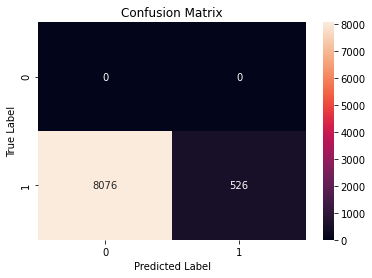

In [0]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
display(plt.show())